# wine-quality-prediction

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.1 MB/s 


In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="wine-quality-prediction")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### INTRODUCTION

The Wine Quality dataset can be found on kaggle [here](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/discussion/308022). It contains information about the red variants of the Portuguese "Vinho Verde" wine. Each wine has a rating between 1-10 based on the mix of chemicals it contains. Can we predict wine quality from the dataset?


In [ ]:
#load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
#load dataset

wine_df = pd.read_csv('https://raw.githubusercontent.com/SandyCOG/Predicting-Wine-Quality/main/WineQT.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
#checking dataset info

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#checking the shape of the dataset

wine_df.shape

(1143, 13)

The dataset has 1143 rows and 13 columns

In [ ]:
#statistical summary

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


From the statistical summary we can observe
- Outliers in residual sugar, free sulfur dioxide & total sulfur dioxide columns.
- The standard deviations for these columns also shows that the data is widely spread when compared to the mean.

In [ ]:
#checking for null values

wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
#checking for duplicates

wine_df.duplicated().sum()

0

There are no duplicates and no missing values in the dataset

In [ ]:
#checking datatypes of columns in dataset

wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
## Converting our target column 'quality' from integer to Categorical column 
 
wine_df['quality'] = pd.Categorical(wine_df.quality)
wine_df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
Id                         int64
dtype: object

In [ ]:
#dropping the id column as it is not needed and does not contribute to wine quality

wine_df = wine_df.drop(columns='Id')

In [ ]:
#Unique values for wine quality

wine_df.quality.unique()  #checking to see the unique classes for wine quality

[5, 6, 7, 4, 8, 3]
Categories (6, int64): [3, 4, 5, 6, 7, 8]

There are six classes for wine rating
- 5, 6, 7, 4, 8, 3

In [ ]:
wine_df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

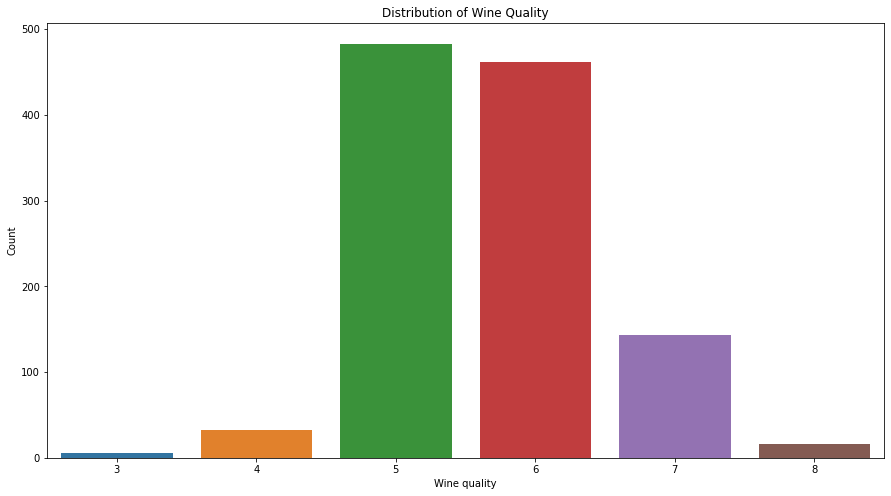

In [ ]:
# visualize the target column - quality 

plt.figure(figsize = (15, 8))
sns.countplot(wine_df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

The classes of wines are not balanced as wines rated as 5 or 6 have more values than other classes of wine.

In [ ]:
#checking for correlation

C = wine_df.corr()

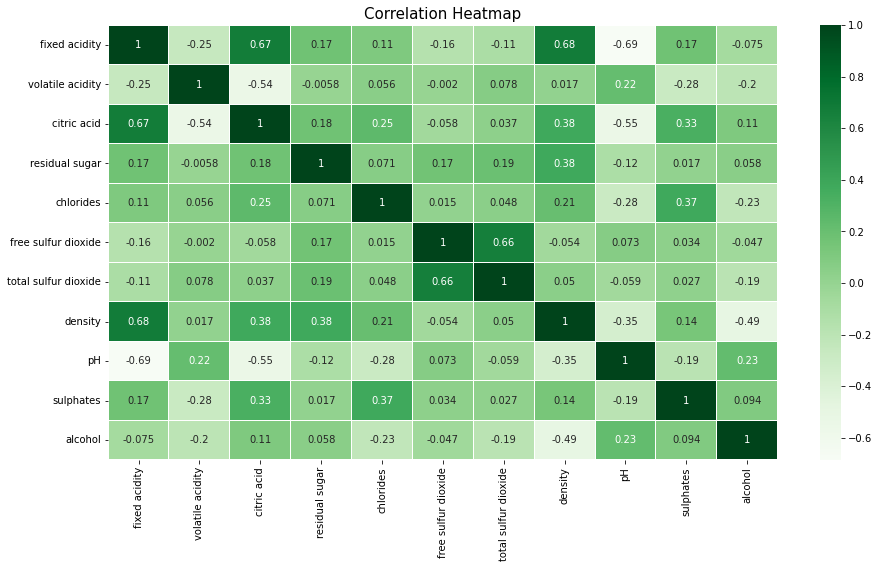

In [ ]:
# correlation heatmap

plt.figure(figsize = (15, 8))
g = sns.heatmap(C, annot = True, cmap = 'Greens', linewidths = 0.1)
plt.title('Correlation Heatmap', size = 15)
plt.show()

From the correlation map above:
  - The highest positive correlation of 0.68 can be observed between density and fixed acidity
  - The lowest negative correlation of -0.69 can be observed between pH and fixed acidity

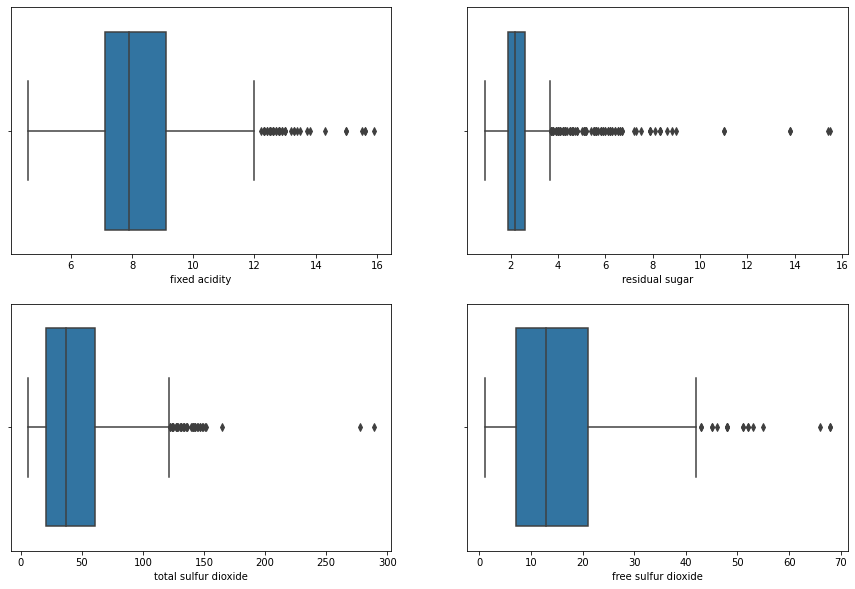

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(x = 'fixed acidity', data=wine_df, ax = ax[0, 0])
sns.boxplot(x = 'residual sugar', data=wine_df, ax = ax[0, 1])
sns.boxplot(x = 'total sulfur dioxide', data=wine_df, ax = ax[1, 0])
sns.boxplot(x = 'free sulfur dioxide', data=wine_df, ax = ax[1, 1])
plt.show()

In [ ]:
# Separate X and y features 

X, y = wine_df[['fixed acidity','volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol']].values, wine_df['quality'].values
y

[5, 5, 5, 6, 5, ..., 6, 6, 5, 6, 5]
Length: 1143
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [ ]:
#splitting the dataset into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)


In [ ]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 800 rows
Test Set: 343 rows


### KNN MODEL

In [ ]:
# Train the Linear regression model
from sklearn.neighbors import KNeighborsClassifier

# Fitting the model on the training set
KNNmodel = KNeighborsClassifier().fit(X_train, y_train)
print (KNNmodel)

KNeighborsClassifier()


In [ ]:
#predicting the test results 
k_y_pred = KNNmodel.predict(X_test) 
k_y_pred[:10]

array([5, 6, 5, 5, 5, 5, 5, 6, 6, 5])

In [ ]:
from sklearn.metrics import accuracy_score
print("Overall Accuracy:", accuracy_score(y_test, k_y_pred))

Overall Accuracy: 0.521865889212828


## OVERSAMPLING FOR IMBALANCED CLASSES

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.3 MB/s 
     |████████████████████████████████| 199 kB 47.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE  #systhentic Minority oversampling Technique

oversample = SMOTE(k_neighbors=2)
X_sm, y_sm = oversample.fit_resample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(1992, 11) (1992,)


In [ ]:
from imblearn.over_sampling import SMOTE  #systhentic Minority oversampling Technique

balancer = SMOTE(random_state = 42)
# fit data to balancer with
X_res, y_res = balancer.fit_resample(X, y)
print(X_res.shape, y_res.shape)

(2898, 11) (2898,)


In [ ]:
# Fitting the model on the training set
KNNmodel = KNeighborsClassifier().fit(X_sm, y_sm)

#predicting the test results 
k_y_pred = KNNmodel.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, k_y_pred))

Overall Accuracy: 0.3760932944606414


In [ ]:
# Fitting the model on the training set
KNNmodel = KNeighborsClassifier().fit(X_res, y_res)

#predicting the test results 
kr_y_pred = KNNmodel.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, kr_y_pred))

Overall Accuracy: 0.5918367346938775


### DECISION TREE ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
DTmodel = DecisionTreeClassifier().fit(X_train, y_train)

DT_y_pred = DTmodel.predict(X_test) 

In [ ]:
# Evaluate the model using the test data
from sklearn. metrics import classification_report

print(classification_report(y_test, DT_y_pred))
print(classification_report(y_test, DTC_y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.11      0.11         9
           5       0.64      0.67      0.65       151
           6       0.53      0.50      0.51       137
           7       0.50      0.56      0.53        41
           8       0.00      0.00      0.00         3

    accuracy                           0.56       343
   macro avg       0.30      0.31      0.30       343
weighted avg       0.56      0.56      0.56       343

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.11      0.07         9
           5       0.63      0.54      0.58       151
           6       0.49      0.46      0.48       137
           7       0.42      0.54      0.47        41
           8       0.09      0.33      0.14         3

    accuracy                           0.49       343
   macro avg       0.28

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, DT_y_pred))
print("Overall Precision:",precision_score(y_test, DT_y_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, DT_y_pred, average='macro'))

Overall Accuracy: 0.5626822157434402
Overall Precision: 0.2969336029067042
Overall Recall: 0.30621854300269047


In [ ]:
# Fitting the model on the training set
DTCmodel = DecisionTreeClassifier().fit(X_sm, y_sm)

#predicting the test results 
DTC_y_pred = DTCmodel.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, DTC_y_pred))

Overall Accuracy: 0.4897959183673469


In [ ]:
# Fitting the model on the training set
DTCmodel_1 = DecisionTreeClassifier().fit(X_res, y_res)

#predicting the test results 
Dtc_y_pred = DTCmodel_1.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, Dtc_y_pred))

Overall Accuracy: 1.0


### RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
RMmodel = RandomForestClassifier().fit(X_train, y_train)

RF_y_pred = RMmodel.predict(X_test) 

In [ ]:
# Evaluate the model using the test data
from sklearn. metrics import classification_report

print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.73      0.72      0.72       151
           6       0.62      0.72      0.66       137
           7       0.70      0.63      0.67        41
           8       0.00      0.00      0.00         3

    accuracy                           0.68       343
   macro avg       0.34      0.34      0.34       343
weighted avg       0.65      0.68      0.66       343



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, RF_y_pred))
print("Overall Precision:",precision_score(y_test, RF_y_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, RF_y_pred, average='macro'))

Overall Accuracy: 0.6763848396501457
Overall Precision: 0.34211426616489904
Overall Recall: 0.34411776611602823


In [ ]:
RandomFmodel = RandomForestClassifier().fit(X_sm, y_sm)

# predict
RDFm_predict = RandomFmodel.predict(X_test)

# accuracy score
score = accuracy_score(y_test, RDFm_predict)

print('Accuracy score is:', score)

Accuracy score is: 0.5889212827988338


# USING LIGHT GRADIENT BOOSTED MACHINE


In [ ]:
# import linrary
from lightgbm import LGBMClassifier

LGBMmodel = LGBMClassifier().fit(X_train, y_train)

# predict
LGy_predict = LGBMmodel.predict(X_test)

# accuracy score
score = accuracy_score(y_test, LGy_predict)

print('Accuracy score is:', score)

Accuracy score is: 0.6530612244897959


In [ ]:
LGBMsmmodel = LGBMClassifier().fit(X_sm, y_sm)

# predict
LGysm_predict = LGBMsmmodel.predict(X_test)

# accuracy score
score = accuracy_score(y_test, LGysm_predict)

print('Accuracy score is:', score)

Accuracy score is: 0.5801749271137027


In [ ]:
# Fitting the model on the training set
LGBMmodel_1 = LGBMClassifier().fit(X_res, y_res)

#predicting the test results 
lgbm_y_pred = LGBMmodel_1.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, lgbm_y_pred))

Overall Accuracy: 1.0


#RECOMMENDATIONS


To improve the accuracy of the model, I recommed:
1. Trying other classification algorithms such as:
   - Naive Bayes
   - Gradient Boosting.
   - XGBClassifier

2. As SMOTE also has it’s limitations I recommend trying other oversampling or undersampling methods such as sklearn utils, smoothen weight technique and sample weight strategy


#### CONCLUSION

- The dataset had 1143 rows and 13 columns
- There were no duplicates and no missing values
- There were 6 categories for wine quality:- 3, 4, 5, 6, 7, 8.
- The RandomForestClassifier has the highest accuracy score of 0.67